<a href="https://colab.research.google.com/github/kaushik67/ceri8211globalgeophysics/blob/master/Homework4/HW4_4(c__d).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 4(c and d)

In [0]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm

In [0]:
phi = np.linspace(0, 2*np.pi, 201)        #Longitudes
theta = np.linspace(0, np.pi, 201)        #Co-Latitudes
phi, theta = np.meshgrid(phi, theta)

In [0]:
def schimid_poly(n,m,theta):   #Schimid polynomial based on n degree and m order

  if (n == 0 and m == 0):
     return 1
  elif (n == 1 and m == 0):
     return np.cos(theta)    
  elif (n == 1 and m == 1):
     return np.sin(theta)
  elif (n == 2 and m == 0):
     return 0.25*((3*np.cos(2*theta))+1 ) 
  elif (n == 2 and m == 1):
     return np.sqrt(3)*(np.cos(theta)*np.sin(theta) )
  elif (n == 2 and m == 2):
     return (np.sqrt(3)/2)*np.power(np.sin(theta),2 )

In [0]:
x = R * np.sin(theta) * np.cos(phi)
y = R * np.sin(theta) * np.sin(phi)
z = R * np.cos(theta)

In [0]:
#values of Gauss co-efficients (nT) from IGRF for 2005
#gnm_05 : the unit is nT
g10_05 = -29557
g11_05 = -1672
g20_05 = -2341
g21_05 = 3047
g22_05 = 1657
h11_05 = 5080
h21_05 = -2595
h22_05 = -517
R = 6371000   #radius(m)

In [0]:
#Calculating the geomagnetic potentials for given Gauss co-efficients using the
#R=r so we can write (R/r)^(n+1)=1
#geomagnetic potential equation 
W_05 = R*((g10_05*schimid_poly(1.0,0.0,theta)) + ((g11_05*np.cos(phi)\
+ h11_05*np.sin(phi))*schimid_poly(1,1,theta)) + (g20_05*schimid_poly(2,0,theta)) +\
(((g21_05*np.cos(phi)) + (h21_05*np.sin(phi)))*schimid_poly(2,1,theta))+\
((g22_05*np.cos(2*phi))+(h22_05*np.sin(2*phi)))*schimid_poly(2,2,theta))

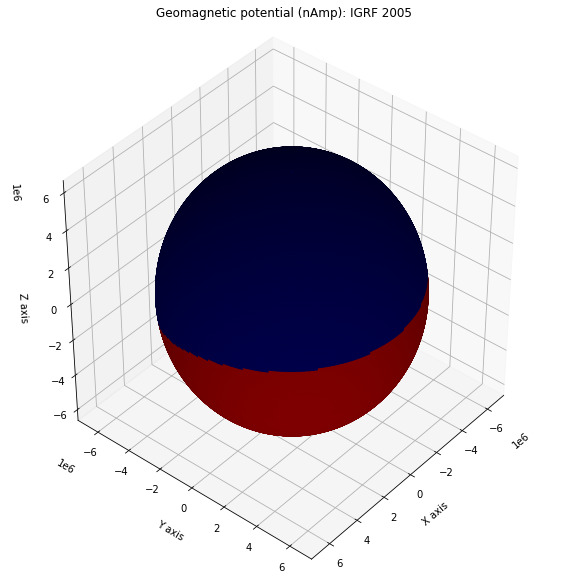

In [0]:
fig = plt.figure(1,figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(W_05))
ax.view_init(40, 40)
plt.tight_layout()
plt.title('Geomagnetic potential (nAmp): IGRF 2005')
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 10
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [0]:
#values of Gauss co-efficients (nT) from IGRF for 2020
#gnm_20 :the unit is nT
g10_20 = -29404.5
g11_20 = -1450.7
g20_20 = -2500
g21_20 = 2982
g22_20 = 1676
h11_20 = 4652.9
h21_20 = -2991.6
h22_20 = -734.8
R = 6371000   #radius(m)

In [0]:
#Calculating the geomagnetic potentials for given Gauss co-efficients using the
#R=r so we can write (R/r)^(n+1)=1
#geomagnetic potential equation 
W_20 = R*((g10_20*schimid_poly(1.0,0.0,theta)) + ((g11_20*np.cos(phi)\
+ h11_20*np.sin(phi))*schimid_poly(1,1,theta)) + (g20_20*schimid_poly(2,0,theta)) +\
(((g21_20*np.cos(phi)) + (h21_20*np.sin(phi)))*schimid_poly(2,1,theta))+\
((g22_20*np.cos(2*phi))+(h22_20*np.sin(2*phi)))*schimid_poly(2,2,theta))

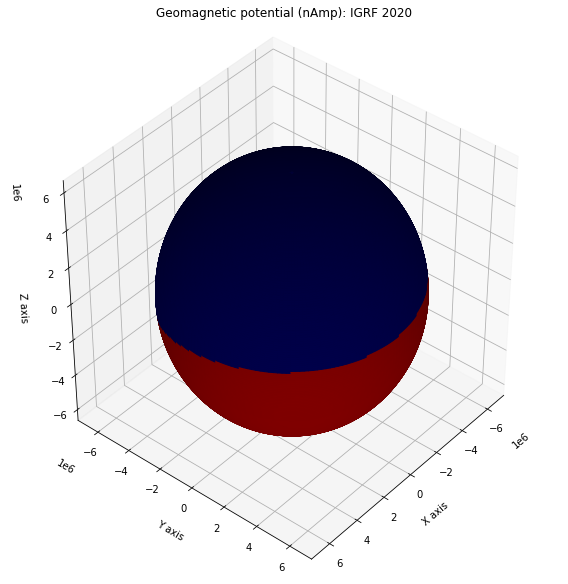

In [0]:
fig = plt.figure(1,figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(W_20))
ax.view_init(40, 40)
plt.tight_layout()
plt.title('Geomagnetic potential (nAmp): IGRF 2020')
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 10
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [121]:
dw=(W_05-W_20)  #the difference of magnetic potentials between two models
dwp=abs(dw/W_05)
percent_difference=dwp*100
print(percent_difference)

[[0.02037745 0.02037745 0.02037745 ... 0.02037745 0.02037745 0.02037745]
 [0.01491384 0.01665213 0.01839402 ... 0.01145504 0.01318089 0.01491384]
 [0.00915174 0.01265327 0.0161621  ... 0.00218498 0.00566111 0.00915174]
 ...
 [1.11414871 1.11287001 1.11162326 ... 1.11679743 1.11545824 1.11414871]
 [1.12960923 1.1289581  1.12832253 ... 1.13095573 1.13027532 1.12960923]
 [1.14454733 1.14454733 1.14454733 ... 1.14454733 1.14454733 1.14454733]]
